# EDA for sentiment, topic, and reporting correlation among various global media agencies

This section aims to revel trends and patterns of our data inorder to gain a deeper understanding. Using the insights we gain here, we can further extract various information on our next section.


## Tools

I'll be using the library pandas, pyplot and seaborn to facilitate in data manipulation and performing initial assessment of the dataset's strucutre


## Approach

### Preparing Our Data

#### Analyzing and Importing our data


In [1]:
# preparing and importing the necessary packages 
import pandas as pd
import numpy as np
import re
import sys
import os
from scipy.stats import zscore
# Manually setting the correct path to src directory
sys.path.append("../../../OFFICAL WEEK0")

from src.loader import NewsDataLoader
import src.utils as utils

In [2]:
# defining the appropriate path for each path
path = {
    "rating":os.environ['RATING_PATH'],
    "domains_location":os.environ['DOMAINS_LOCATION_PATH'],
    "traffic":os.environ['TRAFFIC_PATH']}

# initiating the newsdataloader class
data_loader = NewsDataLoader(path)

In [3]:
# importing relevant data by using the NewsDataloader class 
rating = data_loader.get_data("rating")

domains_location = data_loader.get_data("domains_location")

traffic = data_loader.get_data("traffic")

#### Analysing the various data that has been imported
we analyse rating each data set to gain mroe information about the data

In [4]:
print(rating.columns)
print(traffic.columns)
print(domains_location.columns)

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment'],
      dtype='object')
Index(['GlobalRank', 'TldRank', 'Domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')
Index(['SourceCommonName', 'location', 'Country'], dtype='object')


In [5]:
# checking out the data
rating.head()

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [6]:
traffic.head()

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892


In [7]:
domains_location.head()

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [8]:
# checking out the data quantity
print(rating.shape)
print(traffic.shape)
print(domains_location.shape)

(58356, 13)
(1000000, 12)
(37802, 3)


checking to see the amount of articles for each sources

In [9]:
rating.source_name.value_counts()

source_name
ETF Daily News                  16746
The Times of India               7504
GlobeNewswire                    5423
Globalsecurity.org               3119
Forbes                           2784
BBC News                         2113
ABC News                         2058
Business Insider                 2034
The Punch                        1800
Al Jazeera English               1664
Marketscreener.com               1362
Phys.Org                         1263
International Business Times     1207
The Indian Express               1176
RT                               1128
NPR                               981
Deadline                          932
Digital Trends                    784
Boing Boing                       713
CNA                               674
Time                              600
Android Central                   522
Gizmodo.com                       388
ReadWrite                         324
Euronews                          286
Wired                             270


checking to see the various categories in the category column

In [10]:
rating.category.value_counts()

category
Stock          3687
Canada         2066
Health         2046
Real estate    2030
Technology     1993
               ... 
Burundi           3
Cabo Verde        3
Honduras          3
Martinique        2
Réunion           2
Name: count, Length: 256, dtype: int64

### Purusing data purity
In order to ensure the accuracy and reliabiltiy of the data, we remove duplicates and replace or fill any null values.

In [11]:
print("Count of missing values in rating \n",rating.isnull().sum())
print("Count of missing values in domains_location \n",domains_location.isnull().sum())
print("Count of missing values in traffic \n",traffic.isnull().sum())

Count of missing values in rating 
 article_id             0
source_id          40585
source_name            0
author              2163
title                  0
description           10
url                    0
url_to_image        3451
published_at           0
content                0
category              21
article                0
title_sentiment        0
dtype: int64
Count of missing values in domains_location 
 SourceCommonName    0
location            0
Country             1
dtype: int64
Count of missing values in traffic 
 GlobalRank        0
TldRank           0
Domain            0
TLD               0
RefSubNets        0
RefIPs            0
IDN_Domain        0
IDN_TLD           0
PrevGlobalRank    0
PrevTldRank       0
PrevRefSubNets    0
PrevRefIPs        0
dtype: int64


Since the main attributes which are artices, source_name, title and content are not null we'll just have to keep the null values for the other columns

#### Checking Duplicate values

In [12]:
print("Rating Duplicated Count:",rating.duplicated().sum())
print("Domain Location Duplicated Count:",domains_location.duplicated().sum())
print("Traffic Duplicated Count:",traffic.duplicated().sum())

Rating Duplicated Count: 3773
Domain Location Duplicated Count: 64
Traffic Duplicated Count: 0


#### Removing Duplicates 

In [13]:
rating.drop_duplicates(inplace = True)
domains_location.drop_duplicates(inplace = True)
traffic.drop_duplicates(inplace = True)

In [14]:
# identifying the type of data in each dataset
print("Rating Column Data types \n",rating.dtypes)
print("Traffic Column Data types \n",traffic.dtypes)
print("Domains Location Column Data types \n",domains_location.dtypes)

Rating Column Data types 
 article_id          int64
source_id          object
source_name        object
author             object
title              object
description        object
url                object
url_to_image       object
published_at       object
content            object
category           object
article            object
title_sentiment    object
dtype: object
Traffic Column Data types 
 GlobalRank         int64
TldRank            int64
Domain            object
TLD               object
RefSubNets         int64
RefIPs             int64
IDN_Domain        object
IDN_TLD           object
PrevGlobalRank     int64
PrevTldRank        int64
PrevRefSubNets     int64
PrevRefIPs         int64
dtype: object
Domains Location Column Data types 
 SourceCommonName    object
location            object
Country             object
dtype: object


#### Converting some columns into a more usable form

In [15]:
# converting the names inorder to make easier for later
domains_location_names = {"SourceCommonName":"domain"}
domains_location.rename(columns=domains_location_names,inplace=True)
traffic_names = {"Domain":"domain"}
traffic.rename(columns=traffic_names,inplace=True)

In [16]:
rating['content'] = rating['content'].astype(str)

#### Feature Engineering
obtaining the domain of each rating by extracting it from the url

In [17]:
rating["domain"] = rating["url"].apply(lambda x: utils.extract_keywords(word=x,pattern =r'https?://(?:www\.)?([^/]+)'))

In [18]:
# exploring the new feature
rating["domain"].head()

0             forbes.com
1    channelnewsasia.com
2               time.com
3               phys.org
4      digitaltrends.com
Name: domain, dtype: object

obtaining the mentinoed countries name from each content

In [19]:
list_of_countries = [str(word) for word in domains_location["Country"].unique()]

pattern = re.compile(r'\b(?:{})\b'.format('|'.join(map(re.escape, list_of_countries))), flags=re.IGNORECASE)
rating["mentioned_countries"] = rating["content"].apply(lambda row:utils.find_words_from_list(text=row,word_list=list_of_countries,pattern=pattern))

obtaining the title's length

In [20]:
rating['title_length']=rating['title'].apply(lambda x:len(str(x)))

In [21]:
rating["title_length"].describe()

count    54583.000000
mean        76.651741
std         26.049428
min         12.000000
25%         60.000000
50%         73.000000
75%         89.000000
max        326.000000
Name: title_length, dtype: float64

obtaining the content's length

In [22]:
rating['content_length']=rating['content'].apply(lambda x:len(str(x)))

In [23]:
rating["content_length"].describe().T

count    54583.000000
mean       207.820329
std         28.573536
min         25.000000
25%        213.000000
50%        214.000000
75%        214.000000
max        216.000000
Name: content_length, dtype: float64

In [24]:

region_with_countries = {"africa" : ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cabo Verde", "Cameroon", "Central African Republic", "Chad", "Comoros", "Congo",
"Democratic Republic of the Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Ethiopia", "Eswatini", "Gabon", "Gambia", "Ghana", "Guinea", 
"Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", "Mauritania", "Mauritius", "Morocco", 
"Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "São Tomé and Príncipe", "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", 
"South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", "Uganda", "Zambia", "Zimbabwe"]
,
"europe": ["Albania", "Andorra", "Armenia", "Austria", "Azerbaijan", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", 
"Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Georgia", "Germany", "Greece", "Hungary", "Iceland",
"Ireland", "Italy", "Kosovo", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro",
"Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain",
"Sweden", "Switzerland", "Turkey", "Ukraine", "United Kingdom"]
,
"middle_east" :["Bahrain", "Cyprus", "Egypt", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Qatar", "Saudi Arabia", "Syria",
"Turkey", "United Arab Emirates", "Yemen"]}

creating a column content_based_region for classifying the ratings based on region obtained by using the content column

In [25]:
rating["content_based_region"] = rating["mentioned_countries"].apply(lambda row:utils.creating_region(country=row,region_list=region_with_countries))

In [26]:
rating["content_based_region"].value_counts()

content_based_region
other          50047
europe          1897
middle_east     1521
africa          1118
Name: count, dtype: int64

creating a column content_based_region for classifying the ratings based on region obtained by using the content column

In [27]:
rating["category_based_region"] = rating["category"].apply(lambda row:utils.creating_region(country=row,region_list=region_with_countries))

In [28]:
rating["category_based_region"].value_counts()

category_based_region
other          45715
europe          4754
africa          2741
middle_east     1373
Name: count, dtype: int64

In [29]:
# Exploring the sentiments column
rating['title_sentiment'].value_counts()

title_sentiment
Neutral     40000
Negative     8694
Positive     5889
Name: count, dtype: int64

0    40000
1     8694
2     5889
Name: count, dtype: int64
0     Neutral
1    Negative
2    Positive
Name: category, dtype: object


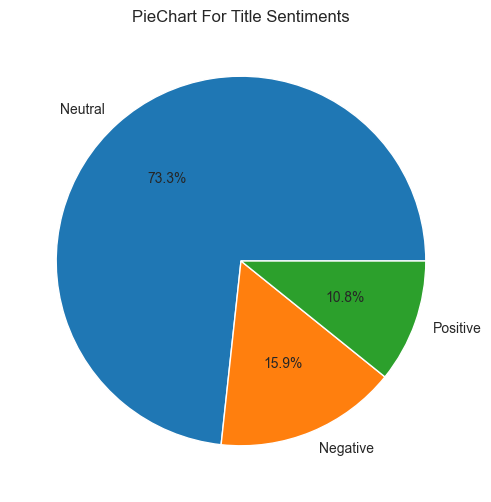

In [30]:
# get the value counts
sentiment_counts = rating['title_sentiment'].value_counts()
sentiment_counts = sentiment_counts.reset_index()
sentiment_counts.columns = ['category', 'count']
    
utils.pie_chart(title="PieChart For Title Sentiments",count=sentiment_counts["count"],labels=sentiment_counts["category"])

## Trend Analysis

We've done the necessary cleaining so we will now proceed with considering with indentifying different patterns that lie within our data

Quantitative Descriptions about different countries and websites 

c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


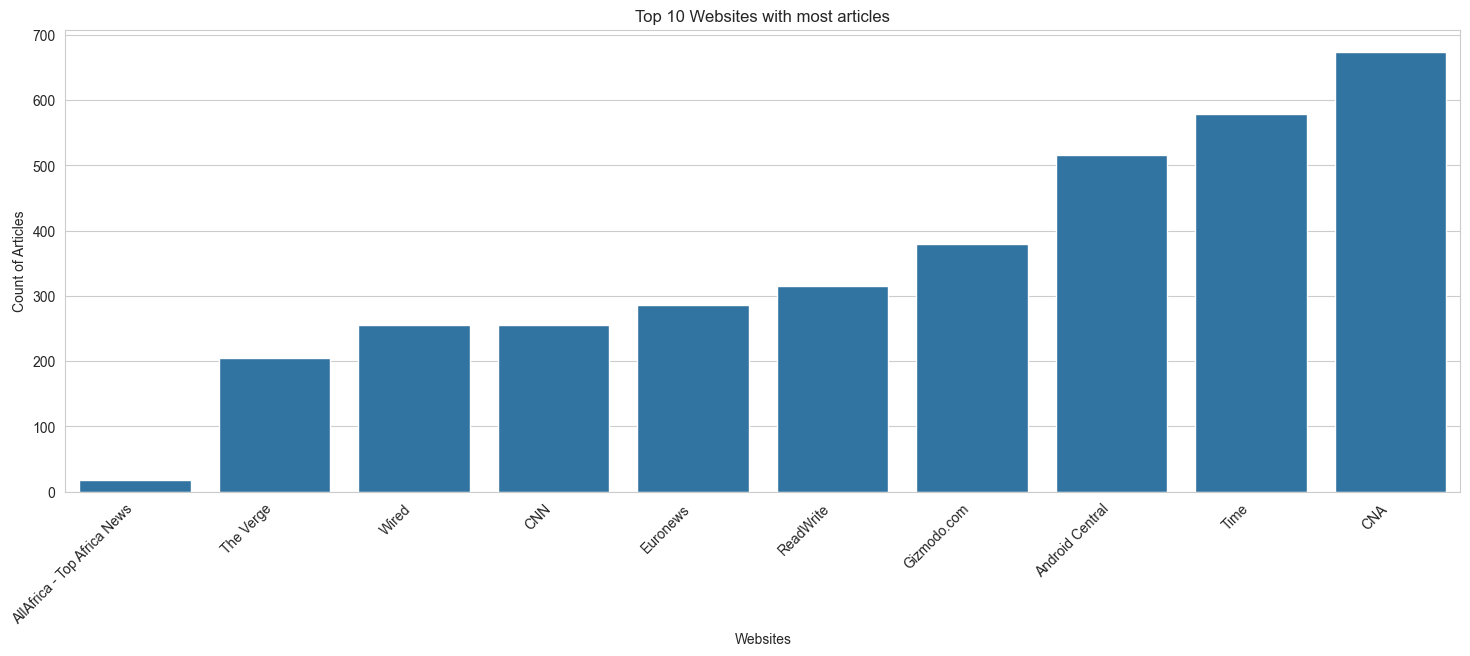

In [31]:
# Websites thtat have the least count of news articles
utils.barchart_with_grouping(df=rating,x_axis="source_name",y_axis="article_id", title = "Top 10 Websites with most articles",  x_label = "Websites", y_label= "Count of Articles",ascending=True,orientation="vertical" )

c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


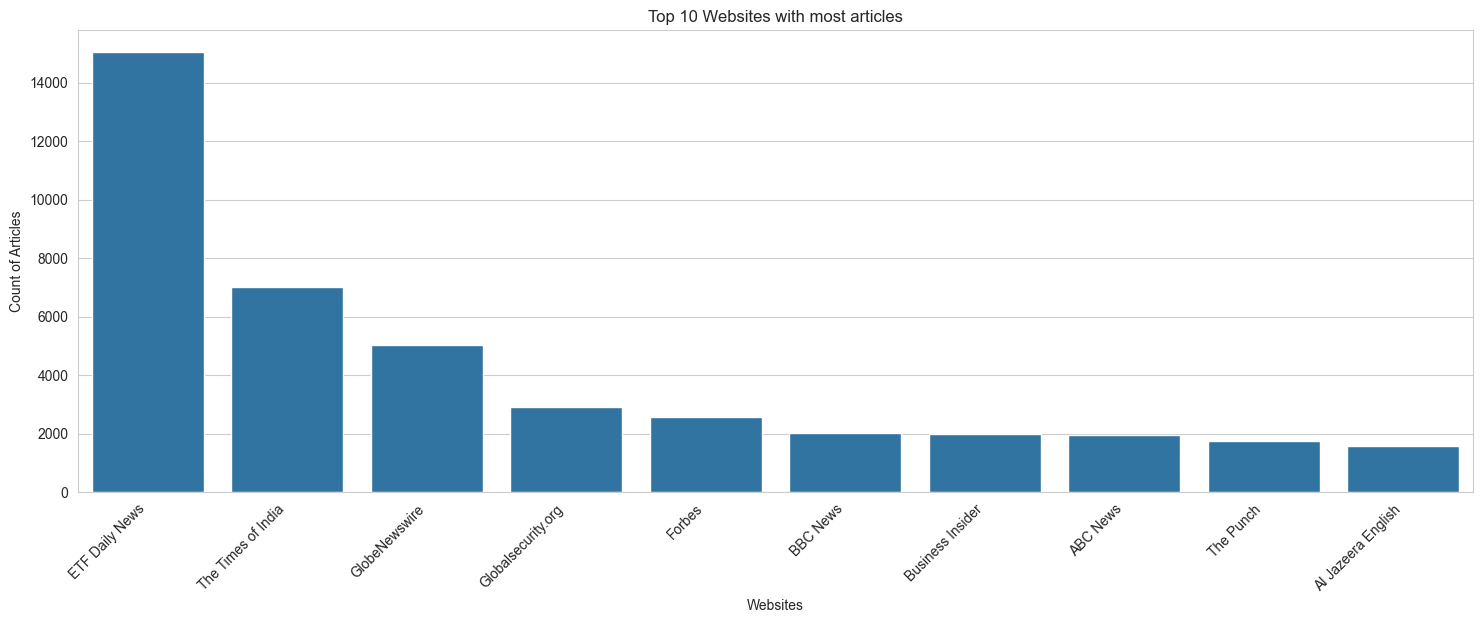

In [32]:
# Websites thtat have the most count of news articles
utils.barchart_with_grouping(df=rating,x_axis="source_name",y_axis="article_id", title = "Top 10 Websites with most articles",  x_label = "Websites", y_label= "Count of Articles",ascending=False ,orientation="vertical")

In [33]:
# Websites that have the highest global rank

sorted_data = traffic.sort_values(by='GlobalRank')

top_ten = sorted_data[['GlobalRank', 'domain']].head(10)
bottom_ten = sorted_data[['GlobalRank', 'domain']].tail(10)

print("Top Ten Domain Names by GlobalRank:")
print(top_ten.to_string(index=False))  # Specify index=False to hide row numbers

print("\nBottom Ten Domain Names by GlobalRank:")
print(bottom_ten.to_string(index=False))


Top Ten Domain Names by GlobalRank:
 GlobalRank               domain
          1           google.com
          2         facebook.com
          3          youtube.com
          4          twitter.com
          5        instagram.com
          6         linkedin.com
          7            apple.com
          8        microsoft.com
          9 googletagmanager.com
         10        wikipedia.org

Bottom Ten Domain Names by GlobalRank:
 GlobalRank                 domain
     999991           eiretrip.com
     999992   exploring-africa.com
     999993               hmag.com
     999994         irishcycle.com
     999995        keith-baker.com
     999996             kireie.com
     999997            mt-lock.com
     999998          pinkwater.com
     999999         soderhomes.com
    1000000 toyotamusicfactory.com


In [34]:

rating_and_traffic_df = pd.merge(rating,traffic,on="domain",how="inner")


In [35]:
grouped_rating_traffic = rating_and_traffic_df.groupby("domain")["RefIPs"].count().reset_index(name='count_of_visitors')

In [36]:
grouped_rating_traffic = grouped_rating_traffic.sort_values(by=['count_of_visitors'], ascending=[False])

In [37]:
short_grouped_rating_traffic_top = grouped_rating_traffic.head() 
short_grouped_rating_traffic_bottom = grouped_rating_traffic.tail() 

c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


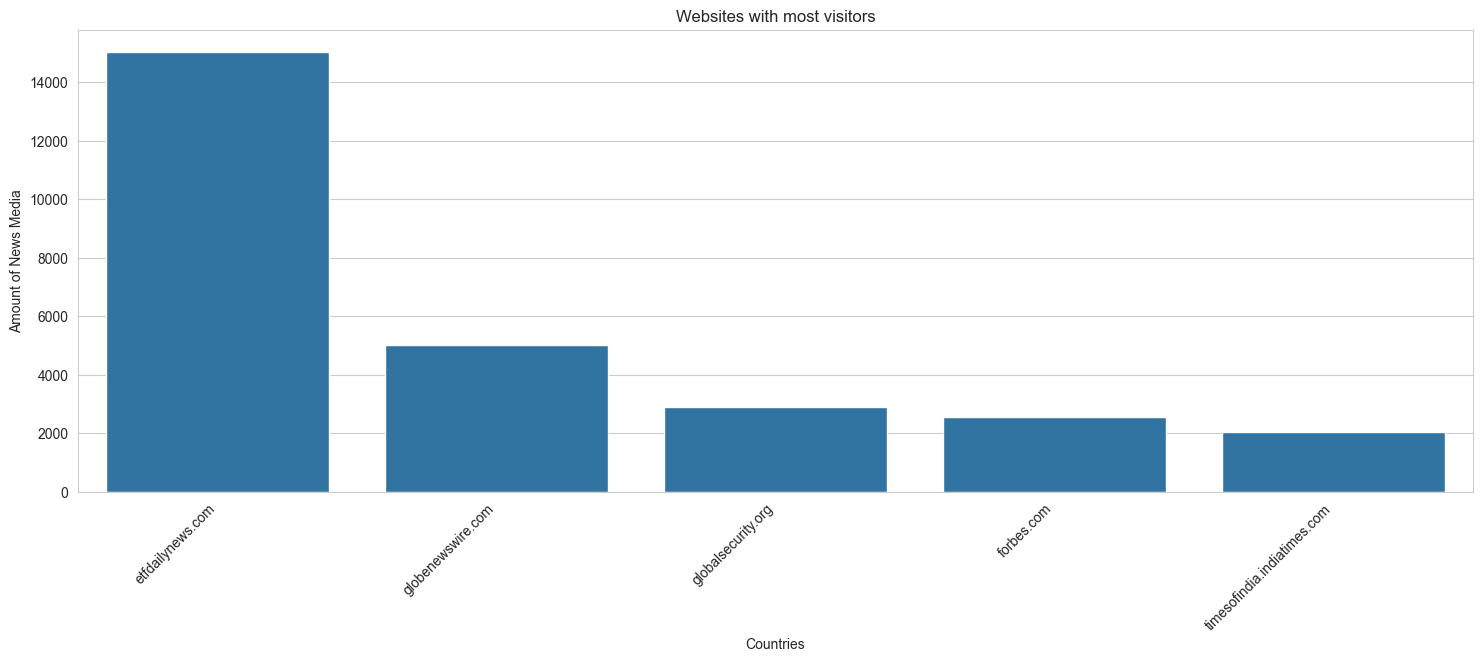

In [38]:
# Websites that have the largest number of visitors
utils.barchart(short_grouped_rating_traffic_top["domain"], short_grouped_rating_traffic_top["count_of_visitors"],  "Countries","Amount of News Media", "Websites with most visitors", orientation="vertical")

c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


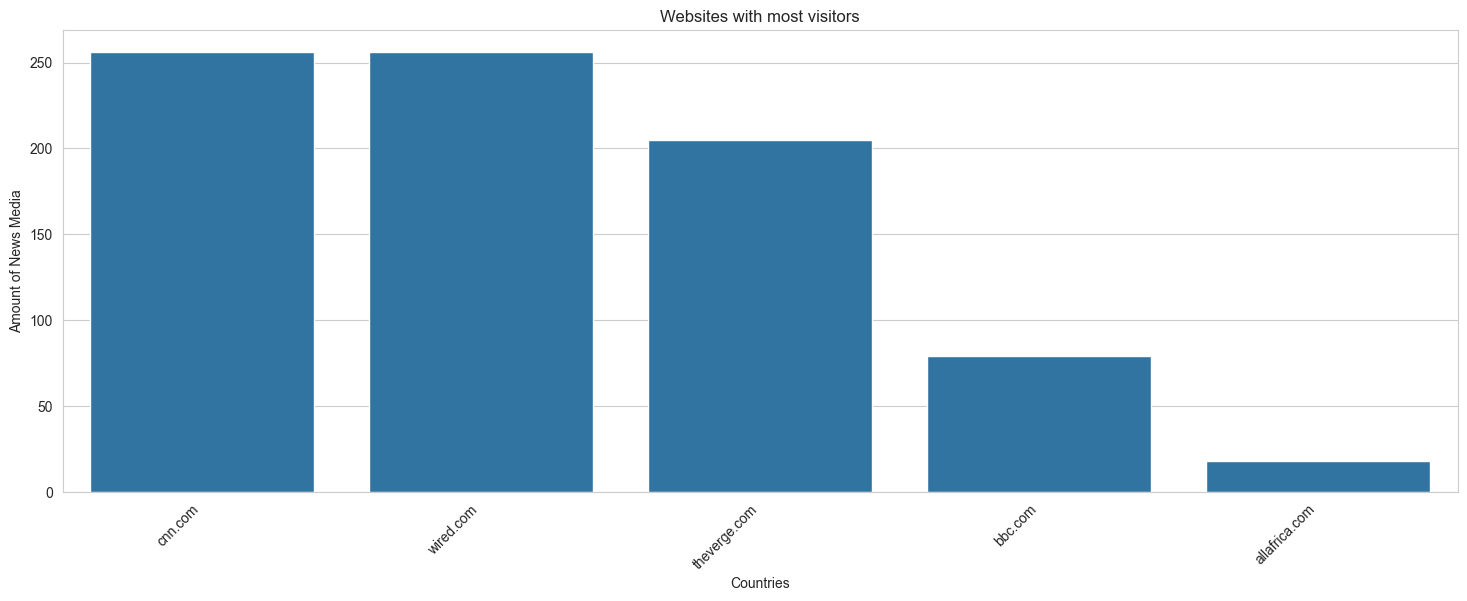

In [39]:
# Websites that have the least number of visitors
utils.barchart(short_grouped_rating_traffic_bottom["domain"], short_grouped_rating_traffic_bottom["count_of_visitors"],  "Countries","Amount of News Media", "Websites with most visitors", orientation="vertical")

C:\Users\alaza\AppData\Local\Temp\ipykernel_22300\3583938143.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_news_media.drop_duplicates(inplace=True)
c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


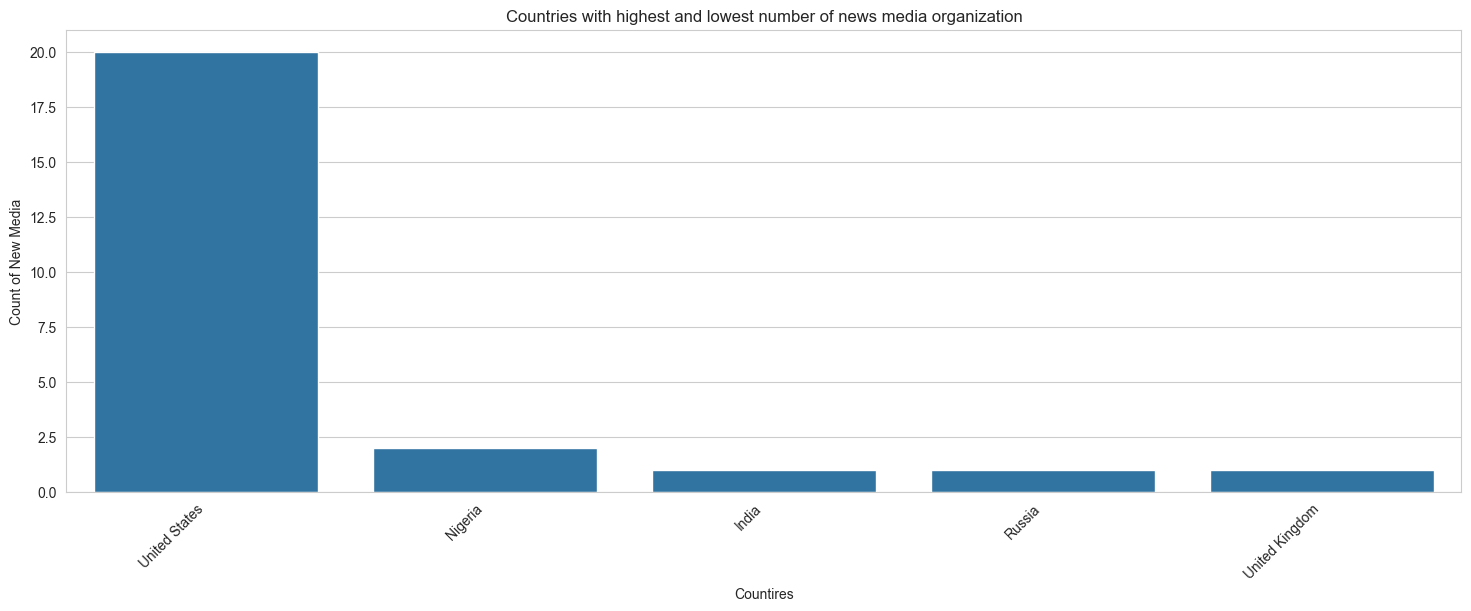

In [40]:
# Countries with the highest and lowest number of news media organisations
rating_and_domain_df = pd.merge(rating,domains_location,on="domain",how="inner")
country_news_media = rating_and_domain_df[["source_name","Country"]]
country_news_media.drop_duplicates(inplace=True)
utils.barchart_with_grouping(country_news_media, "Country", "Count", "Countries with highest and lowest number of news media organization",  "Countires",y_label= "Count of New Media",  ascending=False, grouping='source_name',orientation="vertical")


#### For questions regarding countries, there are two approaches to extract the country name

First Approach : extracting countries from the content column

c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


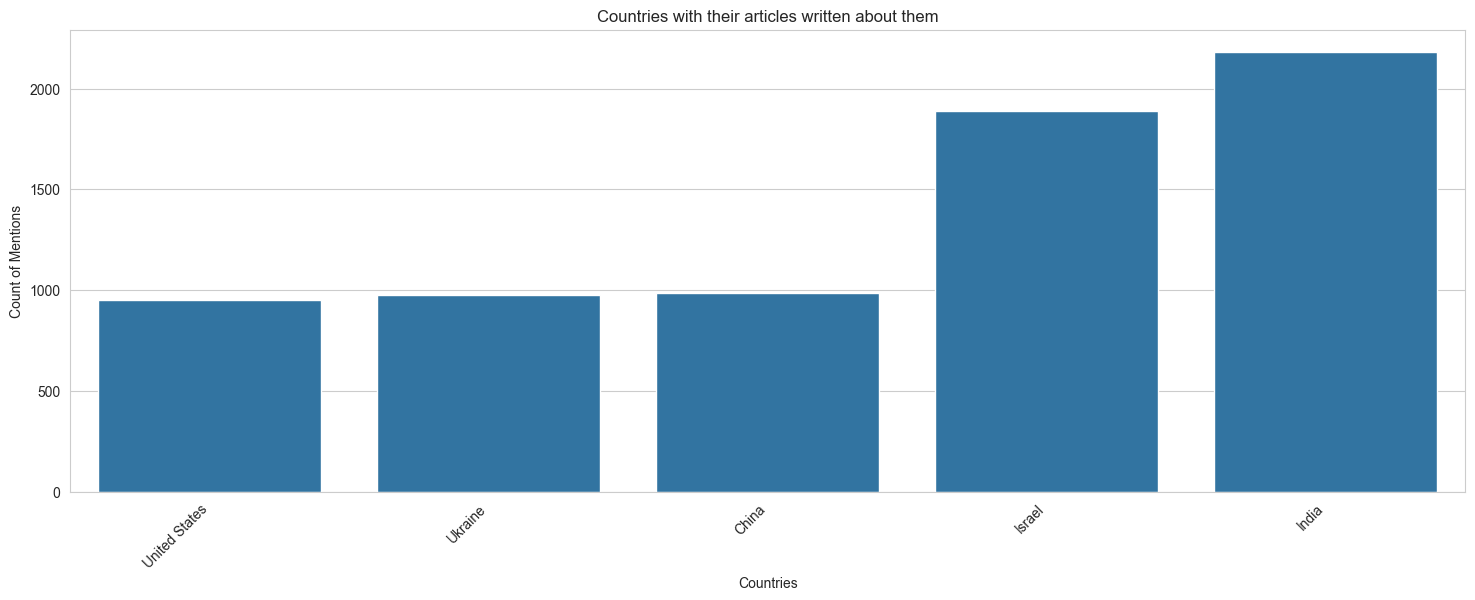

In [41]:
# countries that have many articles written about them based on the content
mentioned_countries = rating["mentioned_countries"].dropna()
mentions = {}
for countries in mentioned_countries:
    for country in countries.split(","):
        if country in mentions:
            mentions[country] +=1
        else:
            mentions[country] = 1
sorted_items = sorted(mentions.items(), key=lambda item: item[1])
top_5 = dict(sorted_items[-5:])

utils.barchart(x_axis=top_5.keys(),y_axis=top_5.values(),x_label="Countries",y_label="Count of Mentions",title="Countries with their articles written about them",orientation="vertical")


In [42]:
content_based_region_filtered_rating = rating[rating["content_based_region"] != "other"]

c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


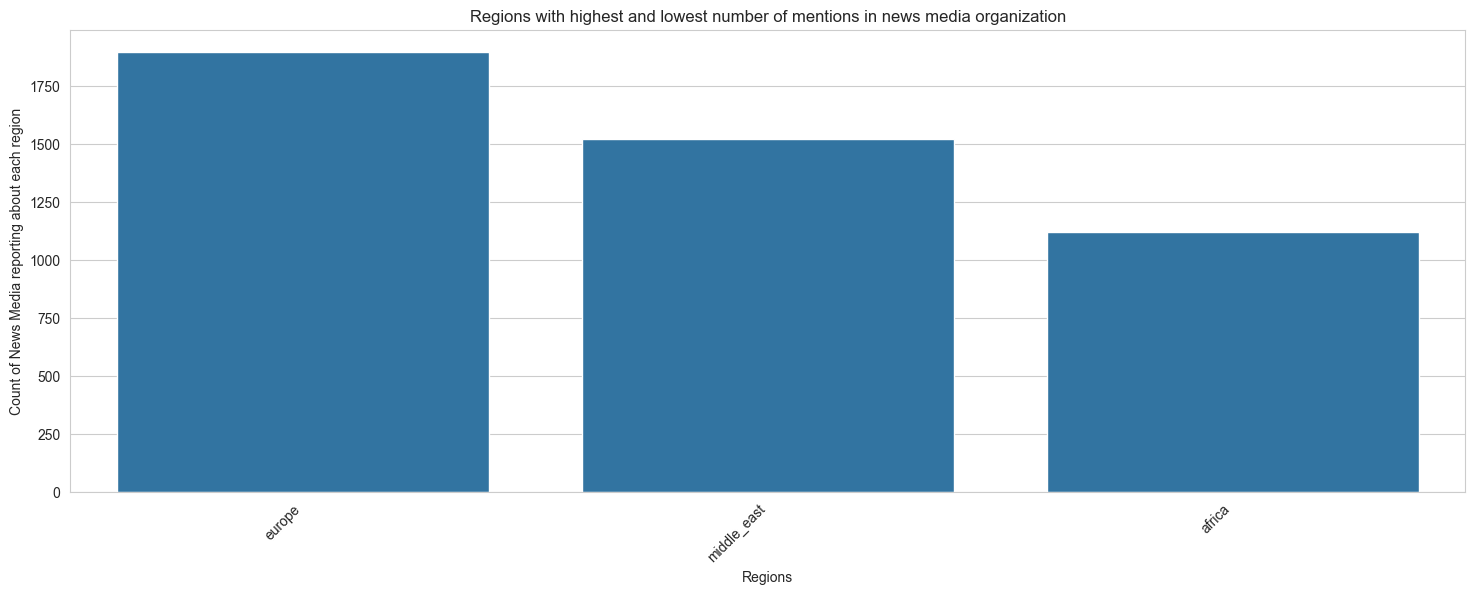

In [43]:
utils.barchart_with_grouping(content_based_region_filtered_rating, "content_based_region", "Count", "Regions with highest and lowest number of mentions in news media organization",  "Regions",y_label= "Count of News Media reporting about each region",  ascending=False, grouping='source_name',orientation="vertical")

Second Approach: using the category column to extract country

In [44]:
country_names = domains_location['Country'].tolist()
country_data = rating[rating['category'].isin(country_names)]
country_talking_counts = country_data['category'].value_counts()
country_talking_counts = country_talking_counts.reset_index()


In [45]:

country_talking_counts.columns = ['country', 'count']
country_talking_counts
sorted_country_talking = country_talking_counts.sort_values(by="count",ascending=False)
top_10_countries = sorted_country_talking.head(10)
bottom_10_countries = sorted_country_talking.tail(10)


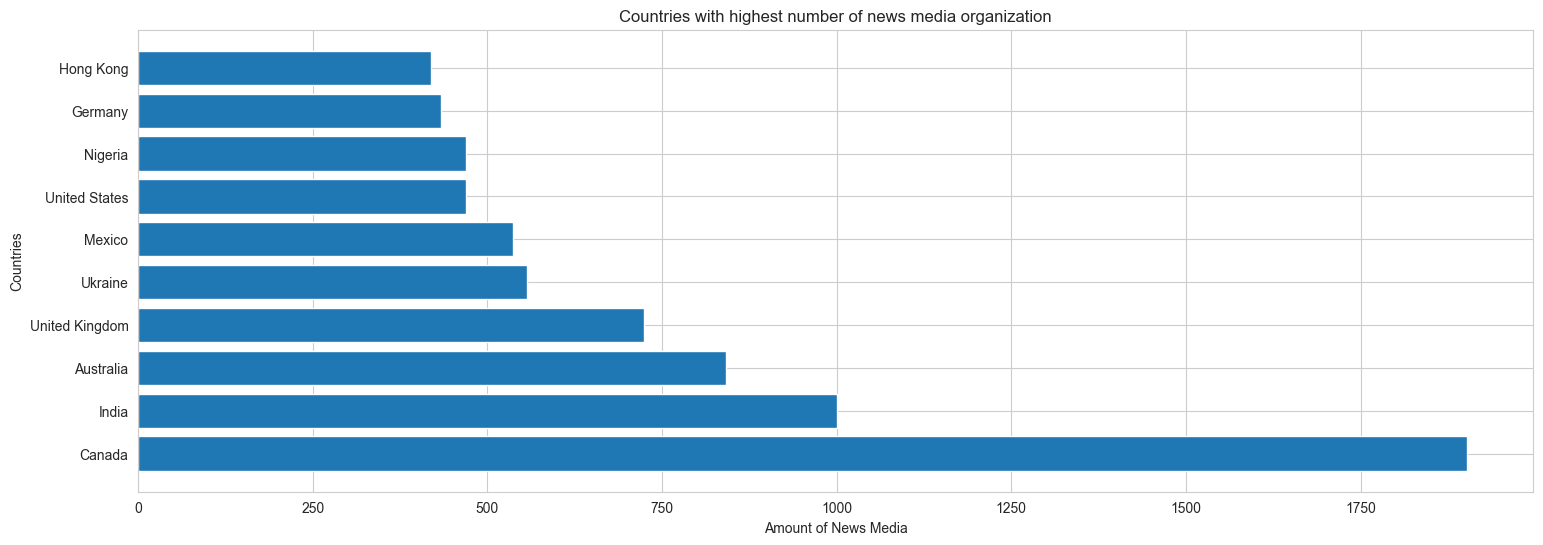

In [46]:
utils.barchart(top_10_countries["country"], top_10_countries["count"],  "Countries","Amount of News Media", "Countries with highest number of news media organization", orientation="horizontal")

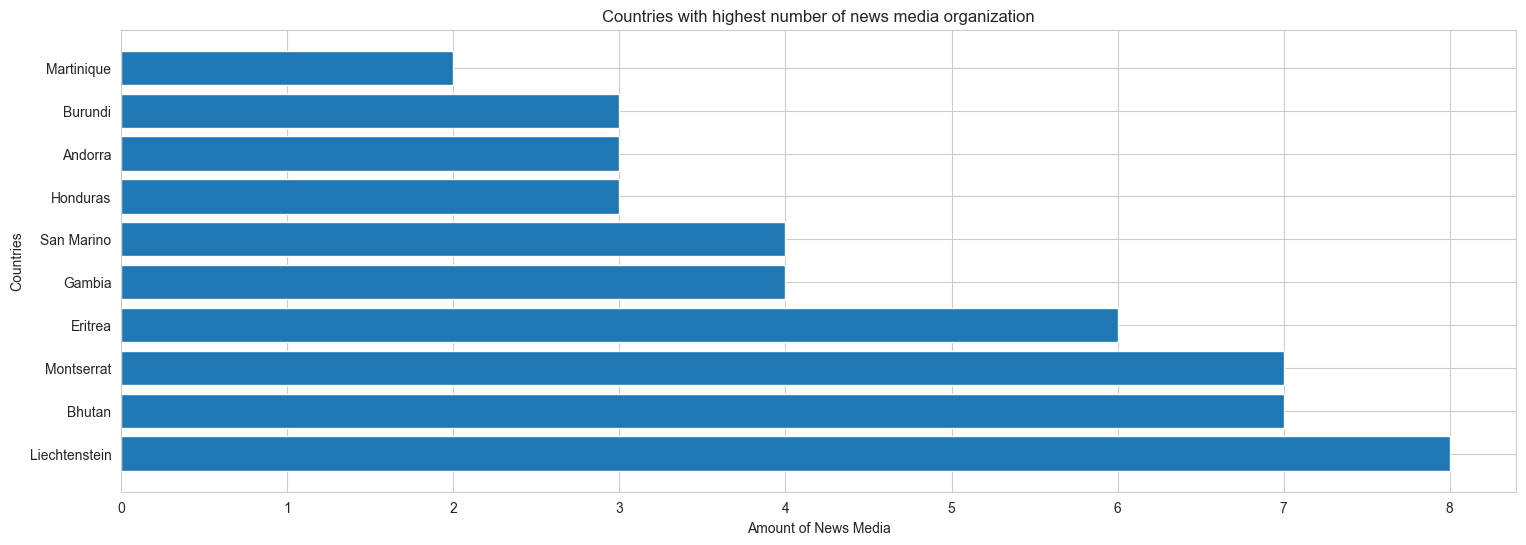

In [47]:
utils.barchart(bottom_10_countries["country"], bottom_10_countries["count"],  "Countries","Amount of News Media", "Countries with highest number of news media organization", orientation="horizontal")


In [48]:
category_based_region_filtered_rating = rating[rating["category_based_region"] != "other"]

c:\Users\alaza\OneDrive\Desktop\Offical Week0\notebooks\EDA\../../../OFFICAL WEEK0\src\utils.py:69: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  sns_plot.set_xticklabels(sns_plot.get_xticklabels(), rotation=45, horizontalalignment="right")


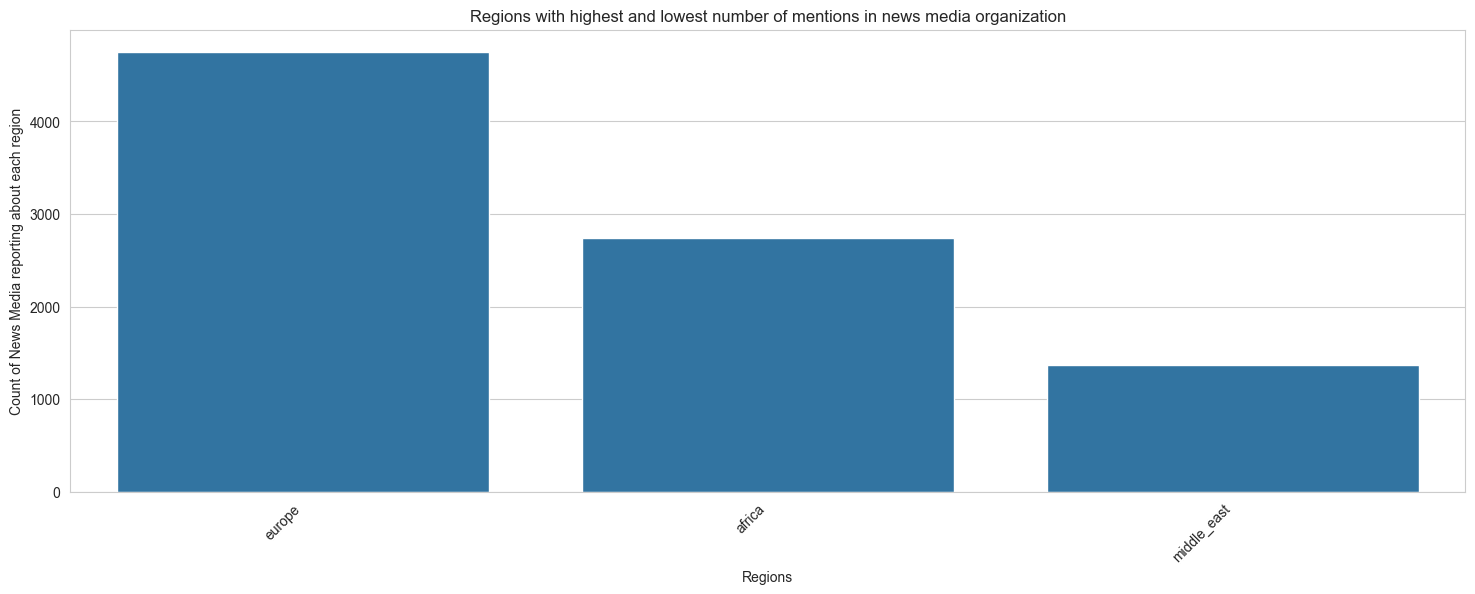

In [49]:
utils.barchart_with_grouping(category_based_region_filtered_rating, "category_based_region", "Count", "Regions with highest and lowest number of mentions in news media organization",  "Regions",y_label= "Count of News Media reporting about each region",  ascending=False, grouping='source_name',orientation="vertical")

In [50]:
# displaying the mean, median and variance for each sentiment 
grouped = rating.groupby(['source_name', 'title_sentiment']).size().unstack(fill_value=0)
grouped["mean"] = grouped.mean(axis=1)
grouped["median"] = grouped.median(axis=1)
grouped["variance"] = grouped.var(axis=1)

In [51]:
grouped[grouped["Negative"]>grouped["Positive"]].count()

title_sentiment
Negative    20
Neutral     20
Positive    20
mean        20
median      20
variance    20
dtype: int64

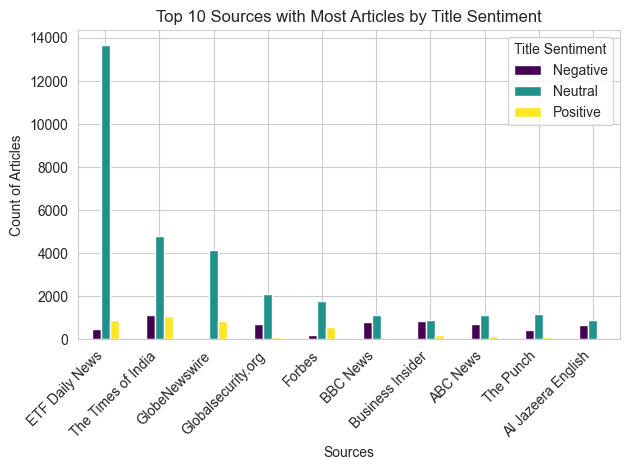

In [52]:
# Sources that have the largest count of news articles
grouped = rating.groupby(['source_name', 'title_sentiment']).size().unstack(fill_value=0)

# Sort by the total count of articles per source
sorted_sources = grouped.sum(axis=1).sort_values(ascending=False).head(10)

# Select the top 10 sources and corresponding data
top_sources = grouped.loc[sorted_sources.index]

utils.grouped_barchart(top_sources, "Title Sentiment", "Top 10 Sources with Most Articles by Title Sentiment", "Sources","Count of Articles",orientation="vertical")

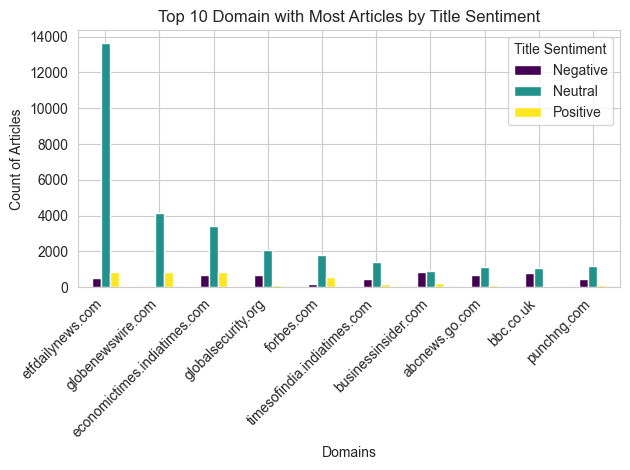

In [53]:
# domains that have the largest count of news articles
grouped = rating.groupby(['domain', 'title_sentiment']).size().unstack(fill_value=0)

# Sort by the total count of articles per domain
sorted_sources = grouped.sum(axis=1).sort_values(ascending=False).head(10)

# Select the top 10 sources and corresponding data
top_sources = grouped.loc[sorted_sources.index]

utils.grouped_barchart(top_sources, "Title Sentiment", "Top 10 Domain with Most Articles by Title Sentiment", "Domains","Count of Articles",orientation="vertical")

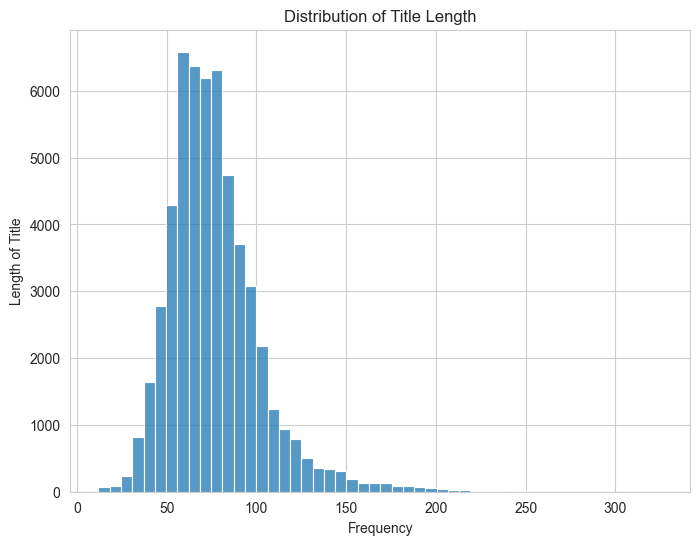

In [54]:
# distribution of title length among various sources
utils.histogram(rating,"title_length","Distribution of Title Length","Frequency","Length of Title")

we can notice that the distribution is a little scewed to the left but overall it has a normal distribution

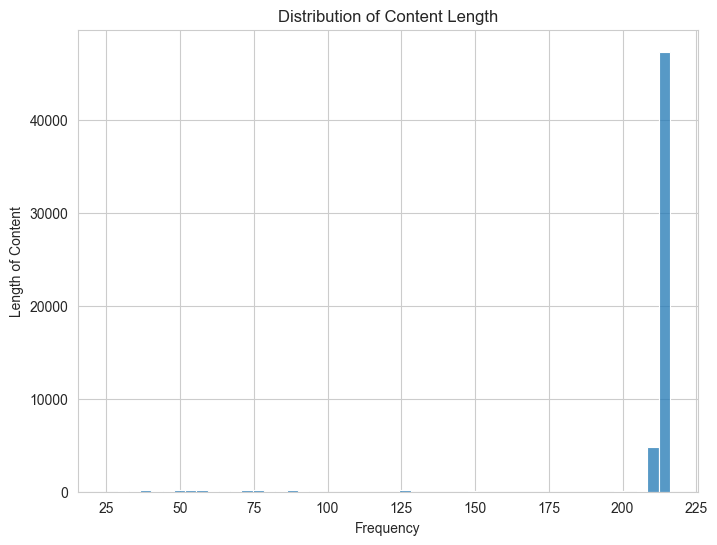

In [55]:
utils.histogram(rating,"content_length","Distribution of Content Length","Frequency","Length of Content")

an outlier exists among this point which has diminshed the result of the rest of the data

In [56]:
rating["z_score"] = zscore(rating["content_length"])

In [57]:
thresholds = np.arange(1, 5, 0.5)
outlier_counts = []
for threshold in thresholds:
    outlier = rating["z_score"].abs() > threshold
    outlier_counts.append(outlier.sum())

# Plot the results

looking at the plot the elbow appears to be around z-score threshold of 2.5 so we will be using that

In [58]:
threshold = 2.5
# Determine outliers
rating['outlier'] = rating['z_score'].abs() > threshold

# Calculate percentage of outliers
outlier_percentage = rating['outlier'].mean() * 100

print(f"Percentage of outliers: {outlier_percentage:.2f}%")


Percentage of outliers: 3.83%


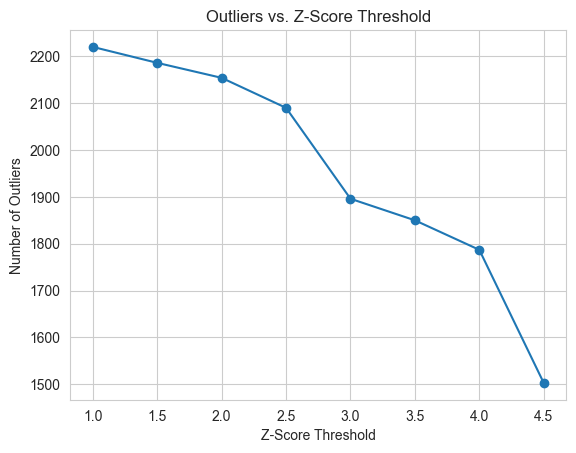

In [59]:

utils.line_graph(thresholds,outlier_counts,'Z-Score Threshold','Number of Outliers','Outliers vs. Z-Score Threshold')

In [60]:
rating.drop(columns=["z_score","outlier"])

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment,domain,mentioned_countries,title_length,content_length,content_based_region,category_based_region
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral,forbes.com,NaN,78,212,other,europe
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive,channelnewsasia.com,NaN,56,212,other,europe
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative,time.com,NaN,77,213,other,africa
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral,phys.org,Madagascar,37,213,africa,africa
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral,digitaltrends.com,NaN,58,214,other,africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58351,781108,NaN,The Indian Express,PTI,"Have done no wrong, only did party work, says ...",The High Court today allowed Shivakumar to wit...,https://indianexpress.com/article/cities/banga...,https://images.indianexpress.com/2023/11/DK-Sh...,2023-11-29 10:57:22,Karnataka Deputy Chief Minister D K Shivakumar...,Home,Karnataka Deputy Chief Minister D K Shivakumar...,Neutral,indianexpress.com,NaN,91,214,other,other
58352,781129,NaN,Forbes,"Tom Sanderson, Senior Contributor, \n Tom Sand...",FC Barcelona Guarantees $77.6 Million Champion...,FC Barcelona have guaranteed at least $77.6 mi...,https://www.forbes.com/sites/tomsanderson/2023...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 08:41:18,FC Barcelona have guaranteed at least $767.6 m...,Home,FC Barcelona have guaranteed at least $767.6 m...,Neutral,forbes.com,NaN,80,214,other,other
58353,781235,NaN,NPR,Brigid McCarthy,Three hospitals ignored her gravely ill fiancé...,"Forty years ago, Sarah Lubarsky came home from...",https://www.npr.org/2023/11/29/1215016001/heal...,https://media.npr.org/assets/img/2023/11/23/sa...,2023-11-29 10:01:12,The photo from David and Sarah Lubarsky's wedd...,Home,The photo from David and Sarah Lubarsky's wedd...,Negative,npr.org,NaN,78,214,other,other
58354,781240,NaN,Forbes,"Gary Stern, Contributor, \n Gary Stern, Contri...",Kerber’s Farm: Bringing Farm To Table To Manha...,"A farmstand in Long Island, Kerber’s Farms has...",https://www.forbes.com/sites/garystern/2023/11...,https://imageio.forbes.com/specials-images/ima...,2023-11-29 13:44:33,Kerbe

In [61]:
outlier_free_rating = rating[rating["outlier"] == False]

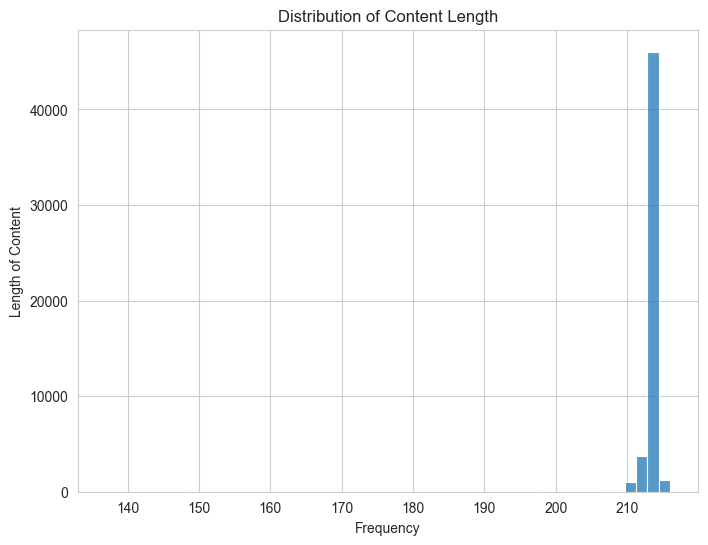

In [62]:
utils.histogram(outlier_free_rating,"content_length","Distribution of Content Length","Frequency","Length of Content")

using z-score hasn't made that much change so let's see in what range the data is mostly in to check if it was an outlier or just that all data is within that range

verifying that there is not outlier between content length 205-225 and seeing whether or not the data is in that range

In [63]:
# Define bins (range of 50)
bin_width = 20
bins = np.arange(rating['content_length'].min(), rating['content_length'].max() + bin_width, bin_width)

# Bin the data
rating['range'] = pd.cut(rating['content_length'], bins)

# Count how many data points fall into each range
range_counts = rating['range'].value_counts().sort_index()

range_counts

range
(25, 45]        513
(45, 65]        551
(65, 85]        550
(85, 105]       232
(105, 125]      164
(125, 145]       92
(145, 165]       84
(165, 185]       58
(185, 205]      114
(205, 225]    52223
Name: count, dtype: int64

## Exporting the Data for model building

Exporting the cleaned dataset is essential for accurate model building since a model requires a clean dataset. In addition it will be useful for future use

In [64]:
# browsing features inorder to remove irrelevant ones
print(rating.columns)
print(traffic.columns)

Index(['article_id', 'source_id', 'source_name', 'author', 'title',
       'description', 'url', 'url_to_image', 'published_at', 'content',
       'category', 'article', 'title_sentiment', 'domain',
       'mentioned_countries', 'title_length', 'content_length',
       'content_based_region', 'category_based_region', 'z_score', 'outlier',
       'range'],
      dtype='object')
Index(['GlobalRank', 'TldRank', 'domain', 'TLD', 'RefSubNets', 'RefIPs',
       'IDN_Domain', 'IDN_TLD', 'PrevGlobalRank', 'PrevTldRank',
       'PrevRefSubNets', 'PrevRefIPs'],
      dtype='object')


Removing Irrelevant columns to make the model building step easier

In [65]:
rating.drop(columns=["source_id","url_to_image","url","z_score","outlier","range"],inplace=True)
traffic.drop(columns=["RefSubNets","IDN_Domain","IDN_TLD","PrevRefSubNets"],inplace=True)


Exporting the data

In [66]:
rating.to_csv("../../data/cleaned_rating.csv",index=False)
traffic.to_csv("../../data/cleaned_traffic.csv",index=False)